# Goals

*   Calculate execution times for different image sizes (use cropping not image resizing).
*   When displaying SSIM and PSNR scores, do not display the images/frames.



# Measure the Noise between the Noisy and Ground Truth Images Using the SSIM and PSNR Metrics

*  SSIM > 0.9: Excellent similarity. The reconstructed/filtered image closely resembles the original image.
*  0.7 < SSIM < 0.9: Good similarity. The reconstructed/filtered image has some minor differences but still maintains a high level of similarity to the original image.
*  0.5 < SSIM < 0.7: Moderate similarity. The reconstructed/filtered image has noticeable differences but still retains some level of similarity to the original image.
*  SSIM < 0.5: Poor similarity. The reconstructed/filtered image has significant differences and may not be visually similar to the original image. differences.

*   ############################################################

*   PSNR > 40 dB: Excellent quality. The reconstructed/filtered image closely resembles the original image.
*   30 dB < PSNR < 40 dB: Good quality. The reconstructed/filtered image has some minor imperfections but is still visually similar to the original image.
*    20 dB < PSNR < 30 dB: Moderate quality. The reconstructed/filtered image has noticeable distortions or noise but is still recognizable.
*    PSNR < 20 dB: Poor quality. The reconstructed/filtered image has significant distortions or noise and may differ significantly from the original image.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

ground_markers_1 = 'SIDD_image_files_full_resolution/0035_GT_SRGB_010.PNG'
ground_markers_2 = 'SIDD_image_files_full_resolution/0035_GT_SRGB_011.PNG'
noisy_markers_1 = 'SIDD_image_files_full_resolution/0035_NOISY_SRGB_010.PNG'
noisy_markers_2 = 'SIDD_image_files_full_resolution/0035_NOISY_SRGB_011.PNG'

ground_peppers_1 = 'SIDD_image_files_full_resolution/0102_GT_SRGB_010.PNG'
ground_peppers_2 = 'SIDD_image_files_full_resolution/0102_GT_SRGB_011.PNG'
noisy_peppers_1 = 'SIDD_image_files_full_resolution/0102_NOISY_SRGB_010.PNG'
noisy_peppers_2 = 'SIDD_image_files_full_resolution/0102_NOISY_SRGB_011.PNG'

image_list = [ground_markers_1, ground_markers_2, noisy_markers_1, noisy_markers_2, ground_peppers_1, ground_peppers_2, noisy_peppers_1, noisy_peppers_2]

ground_image_list_4k = [ground_markers_1, ground_markers_2, ground_peppers_1, ground_peppers_2]
noisy_image_list_4k = [noisy_markers_1, noisy_markers_2, noisy_peppers_1, noisy_peppers_2]

# Create a list to store the ground image frames in size 480p (cropping).
ground_image_list_480 = []
for image_path in ground_image_list_4k:
    image = Image.open(image_path)
    resized_image = image.crop((0, 0, 854, 480))
    ground_image_list_480.append(resized_image)

# Create a list to store the ground image frames in size 720p (cropping).
ground_image_list_720 = []
for image_path in ground_image_list_4k:
    image = Image.open(image_path)
    resized_image = image.crop((0, 0, 1280, 720))
    ground_image_list_720.append(resized_image)

# Create a list to store the noisy image frames in size 480p (cropping).
noisy_image_list_480 = []
for image_path in noisy_image_list_4k:
    image = Image.open(image_path)
    resized_image = image.crop((0, 0, 854, 480))
    noisy_image_list_480.append(resized_image)

# Create a list to store the noisy image frames in size 720p (cropping).
noisy_image_list_720 = []
for image_path in noisy_image_list_4k:
    image = Image.open(image_path)
    resized_image = image.crop((0, 0, 1280, 720))
    noisy_image_list_720.append(resized_image)

In [2]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create an empty list to store the SSIM scores
ssim_scores_4k = []
psnr_scores_4k = []

for ground_image_path_4k, noisy_image_path_4k in zip(ground_image_list_4k, noisy_image_list_4k):

    ground_image_4k = Image.open(ground_image_path_4k)
    noisy_image_4k = Image.open(noisy_image_path_4k)

    # PSNR -- Convert to NumPy arrays
    ground_image_4k_np = np.array(ground_image_4k)
    noisy_image_4k_np = np.array(noisy_image_4k)

    # SSIM -- Convert to gray-scale and NumPy arrays
    ground_image_4k_gray = np.array(ground_image_4k.convert('L'))
    noisy_image_4k_gray = np.array(noisy_image_4k.convert('L'))

    # Calculate SSIM
    ssim_score = ssim(ground_image_4k_gray, noisy_image_4k_gray)

    # Calculate PSNR
    psnr_score = psnr(ground_image_4k_np, noisy_image_4k_np)

    # Append the SSIM score to the list
    ssim_scores_4k.append(ssim_score)

    # Append the PSNR score to the list
    psnr_scores_4k.append(psnr_score)

# Calculate the average SSIM score (4K)
average_ssim_4k = np.mean(ssim_scores_4k)
print(f"Average SSIM Score 4K: {average_ssim_4k:.4f}")

# Calculate the average PSNR score (4k)
average_psnr_4k = np.mean(psnr_scores_4k)
print(f"Average PSNR Score 4K: {average_psnr_4k:.4f}")

Average SSIM Score 4K: 0.6315
Average PSNR Score 4K: 26.9816


In [3]:
# Create an empty list to store the SSIM scores
ssim_scores_480 = []
psnr_scores_480 = []

for ground_image_path_480, noisy_image_path_480 in zip(ground_image_list_480, noisy_image_list_480):

    ground_image_480 = ground_image_path_480
    noisy_image_480 = noisy_image_path_480

    # PSNR -- Convert to NumPy arrays
    ground_image_480_np = np.array(ground_image_480)
    noisy_image_480_np = np.array(noisy_image_480)

    # SSIM -- Convert to gray-scale and NumPy arrays
    ground_image_480_gray = np.array(ground_image_480.convert('L'))
    noisy_image_480_gray = np.array(noisy_image_480.convert('L'))

    # Calculate SSIMm
    ssim_score = ssim(ground_image_480_gray, noisy_image_480_gray)

    # Calculate PSNR
    psnr_score = psnr(ground_image_480_np, noisy_image_480_np)

    # Append the SSIM score to the list
    ssim_scores_480.append(ssim_score)

    # Append the PSNR score to the list
    psnr_scores_480.append(psnr_score)

# Calculate the average SSIM score (480p)
average_ssim_480 = np.mean(ssim_scores_480)
print(f"Average SSIM Score 480p: {average_ssim_480:.4f}")

# Calculate the average PSNR score (480p)
average_psnr_480 = np.mean(psnr_scores_480)
print(f"Average PSNR Score 480p: {average_psnr_480:.4f}")

Average SSIM Score 480p: 0.5883
Average PSNR Score 480p: 26.2949


In [4]:
# Create an empty list to store the SSIM scores
ssim_scores_720 = []
psnr_scores_720 = []

for ground_image_path_720, noisy_image_path_720 in zip(ground_image_list_720, noisy_image_list_720):

    ground_image_720 = ground_image_path_720
    noisy_image_720 = noisy_image_path_720

    # PSNR -- Convert to NumPy arrays
    ground_image_720_np = np.array(ground_image_720)
    noisy_image_720_np = np.array(noisy_image_720)

    # SSIM -- Convert to gray-scale and NumPy arrays
    ground_image_720_gray = np.array(ground_image_720.convert('L'))
    noisy_image_720_gray = np.array(noisy_image_720.convert('L'))

    # Calculate SSIMm
    ssim_score = ssim(ground_image_720_gray, noisy_image_720_gray)

    # Calculate PSNR
    psnr_score = psnr(ground_image_720_np, noisy_image_720_np)

    # Append the SSIM score to the list
    ssim_scores_720.append(ssim_score)

    # Append the PSNR score to the list
    psnr_scores_720.append(psnr_score)

# Calculate the average SSIM score (720p)
average_ssim_720 = np.mean(ssim_scores_720)
print(f"Average SSIM Score 720p: {average_ssim_720:.4f}")

# Calculate the average PSNR score (720p)
average_psnr_720 = np.mean(psnr_scores_720)
print(f"Average PSNR Score 720p: {average_psnr_720:.4f}")

Average SSIM Score 720p: 0.6243
Average PSNR Score 720p: 26.5032


# Take the Noisy Images and Apply a Gaussian Filter to “Clean Up” the Images

*   Explore parameters to get the “cleanest” images (don't spend too much time).
*   Measure how long it takes to apply the gaussian filter to an image.



In [5]:
from skimage.filters import gaussian
import time

# Define the parameters for the Gaussian filter --> These parameters can be edited to improve SSIM and PSNR scores.
sigma = 1.5 # Standard deviation of the Gaussian kernel
truncate = 2.0 # Truncation of the Gaussian kernel

# List to store the filtered images
filtered_image_list_4k = []

# List to store the execution times
executionTimes_4k = []

# Apply Gaussian filter to each noisy image
for noisy_image_path_4k in noisy_image_list_4k:
    noisy_image_4k = Image.open(noisy_image_path_4k)
    noisy_image_arr_4k = np.array(noisy_image_4k)

    # Normalize the pixel values to the range of 0 to 1
    normalized_image_arr_4k = noisy_image_arr_4k.astype(np.float32) / 255.0

    # Apply the Gaussian filter
    start_time = time.time()
    filtered_image_4k = gaussian(normalized_image_arr_4k, sigma=sigma, truncate=truncate, multichannel=True)
    end_time = time.time()

    # Scale the pixel values back to the range of 0 to 255
    filtered_image_scaled_4k = (filtered_image_4k * 255.0).clip(0, 255).astype(np.uint8)

    # Convert the filtered image array back to PIL Image
    filtered_image_pil_4k = Image.fromarray(filtered_image_scaled_4k)

    # Add the filtered image to the list
    filtered_image_list_4k.append(filtered_image_pil_4k)

    # Calculate the execution time
    execution_time_4k = end_time - start_time

    # Append the execution time to the list
    executionTimes_4k.append(execution_time_4k)

# Calculate the average execution time scores
average_execution_time_4k = np.mean(executionTimes_4k)
print(f"Average Execution Time (4K): {average_execution_time_4k:.4f} seconds\n")

C:\Users\anish\AppData\Local\Temp\ipykernel_20996\1811213854.py:24: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_image_4k = gaussian(normalized_image_arr_4k, sigma=sigma, truncate=truncate, multichannel=True)


Average Execution Time (4K): 0.7323 seconds



In [6]:
# Define the parameters for the Gaussian filter --> These parameters can be edited to improve SSIM and PSNR scores.
sigma = 1.5 # Standard deviation of the Gaussian kernel
truncate = 2.0 # Truncation of the Gaussian kernel

# List to store the filtered images
filtered_image_list_480 = []

# List to store the execution times
executionTimes_480 = []

# Apply Gaussian filter to each noisy image
for noisy_image_path_480 in noisy_image_list_480:
    noisy_image_480 = noisy_image_path_480
    noisy_image_arr_480 = np.array(noisy_image_480)

    # Normalize the pixel values to the range of 0 to 1
    normalized_image_arr_480 = noisy_image_arr_480.astype(np.float32) / 255.0

    # Apply the Gaussian filter
    start_time = time.time()
    filtered_image_480 = gaussian(normalized_image_arr_480, sigma=sigma, truncate=truncate, multichannel=True)
    end_time = time.time()

    # Scale the pixel values back to the range of 0 to 255
    filtered_image_scaled_480 = (filtered_image_480 * 255.0).clip(0, 255).astype(np.uint8)

    # Convert the filtered image array back to PIL Image
    filtered_image_pil_480 = Image.fromarray(filtered_image_scaled_480)

    # Add the filtered image to the list
    filtered_image_list_480.append(filtered_image_pil_480)

    # Calculate the execution time
    execution_time_480 = end_time - start_time

    # Append the execution time to the list
    executionTimes_480.append(execution_time_480)

# Calculate the average execution time scores
average_execution_time_480 = np.mean(executionTimes_480)
print(f"Average Execution Time (480p): {average_execution_time_480:.4f} seconds\n")

Average Execution Time (480p): 0.0106 seconds



C:\Users\anish\AppData\Local\Temp\ipykernel_20996\150798017.py:21: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_image_480 = gaussian(normalized_image_arr_480, sigma=sigma, truncate=truncate, multichannel=True)


In [7]:
# Define the parameters for the Gaussian filter --> These parameters can be edited to improve SSIM and PSNR scores.
sigma = 1.5 # Standard deviation of the Gaussian kernel
truncate = 2.0 # Truncation of the Gaussian kernel

# List to store the filtered images
filtered_image_list_720 = []

# List to store the execution times
executionTimes_720 = []

# Apply Gaussian filter to each noisy image
for noisy_image_path_720 in noisy_image_list_720:
    noisy_image_720 = noisy_image_path_720
    noisy_image_arr_720 = np.array(noisy_image_720)

    # Normalize the pixel values to the range of 0 to 1
    normalized_image_arr_720 = noisy_image_arr_720.astype(np.float32) / 255.0

    # Apply the Gaussian filter
    start_time = time.time()
    filtered_image_720 = gaussian(normalized_image_arr_720, sigma=sigma, truncate=truncate, multichannel=True)
    end_time = time.time()

    # Scale the pixel values back to the range of 0 to 255
    filtered_image_scaled_720 = (filtered_image_720 * 255.0).clip(0, 255).astype(np.uint8)

    # Convert the filtered image array back to PIL Image
    filtered_image_pil_720 = Image.fromarray(filtered_image_scaled_720)

    # Add the filtered image to the list
    filtered_image_list_720.append(filtered_image_pil_720)

    # Calculate the execution time
    execution_time_720 = end_time - start_time

    # Append the execution time to the list
    executionTimes_720.append(execution_time_720)

# Calculate the average execution time scores
average_execution_time_720 = np.mean(executionTimes_720)
print(f"Average Execution Time (720p): {average_execution_time_720:.4f} seconds\n")

Average Execution Time (720p): 0.0306 seconds



C:\Users\anish\AppData\Local\Temp\ipykernel_20996\1774760033.py:21: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  filtered_image_720 = gaussian(normalized_image_arr_720, sigma=sigma, truncate=truncate, multichannel=True)


# Compare the Filtered Images Quantitatively (SSIM, PSNR) to the Ground Truth Images

*  SSIM > 0.9: Excellent similarity. The reconstructed/filtered image closely resembles the original image.
*  0.7 < SSIM < 0.9: Good similarity. The reconstructed/filtered image has some minor differences but still maintains a high level of similarity to the original image.
*  0.5 < SSIM < 0.7: Moderate similarity. The reconstructed/filtered image has noticeable differences but still retains some level of similarity to the original image.
*  SSIM < 0.5: Poor similarity. The reconstructed/filtered image has significant differences and may not be visually similar to the original image. differences.

*   ############################################################

*   PSNR > 40 dB: Excellent quality. The reconstructed/filtered image closely resembles the original image.
*   30 dB < PSNR < 40 dB: Good quality. The reconstructed/filtered image has some minor imperfections but is still visually similar to the original image.
*    20 dB < PSNR < 30 dB: Moderate quality. The reconstructed/filtered image has noticeable distortions or noise but is still recognizable.
*    PSNR < 20 dB: Poor quality. The reconstructed/filtered image has significant distortions or noise and may differ significantly from the original image.


In [8]:
# Create an empty list to store the SSIM scores
ssim_scores_4k = []
psnr_scores_4k = []

for ground_image_path_4k, filtered_image_path_4k in zip(ground_image_list_4k, filtered_image_list_4k):

    ground_image_4k = Image.open(ground_image_path_4k)
    filtered_image_4k = filtered_image_path_4k

    # PSNR -- Convert to NumPy arrays
    ground_image_4k_np = np.array(ground_image_4k)
    filtered_image_4k_np = np.array(filtered_image_4k)

    # SSIM -- Convert to gray-scale and NumPy arrays
    ground_image_4k_gray = np.array(ground_image_4k.convert('L'))
    filtered_image_4k_gray = np.array(filtered_image_4k.convert('L'))

    # Calculate SSIM
    ssim_score = ssim(ground_image_4k_gray, filtered_image_4k_gray)

    # Calculate PSNR
    psnr_score = psnr(ground_image_4k_np, filtered_image_4k_np)

    # Append the SSIM score to the list
    ssim_scores_4k.append(ssim_score)

    # Append the PSNR score to the list
    psnr_scores_4k.append(psnr_score)

# Calculate the average SSIM score (4K)
average_ssim_4k = np.mean(ssim_scores_4k)
print(f"Average SSIM Score 4K: {average_ssim_4k:.4f}")

# Calculate the average PSNR score (4k)
average_psnr_4k = np.mean(psnr_scores_4k)
print(f"Average PSNR Score 4K: {average_psnr_4k:.4f}")

Average SSIM Score 4K: 0.9426
Average PSNR Score 4K: 33.2666


In [9]:
# Create an empty list to store the SSIM scores
ssim_scores_480 = []
psnr_scores_480 = []

for ground_image_path_480, filtered_image_path_480 in zip(ground_image_list_480, filtered_image_list_480):

    ground_image_480 = ground_image_path_480
    filtered_image_480 = filtered_image_path_480

    # PSNR -- Convert to NumPy arrays
    ground_image_480_np = np.array(ground_image_480)
    filtered_image_480_np = np.array(filtered_image_480)

    # SSIM -- Convert to gray-scale and NumPy arrays
    ground_image_480_gray = np.array(ground_image_480.convert('L'))
    filtered_image_480_gray = np.array(filtered_image_480.convert('L'))

    # Calculate SSIM
    ssim_score = ssim(ground_image_480_gray, filtered_image_480_gray)

    # Calculate PSNR
    psnr_score = psnr(ground_image_480_np, filtered_image_480_np)

    # Append the SSIM score to the list
    ssim_scores_480.append(ssim_score)

    # Append the PSNR score to the list
    psnr_scores_480.append(psnr_score)

# Calculate the average SSIM score (480)
average_ssim_480 = np.mean(ssim_scores_480)
print(f"Average SSIM Score 480p: {average_ssim_480:.4f}")

# Calculate the average PSNR score (480)
average_psnr_480 = np.mean(psnr_scores_480)
print(f"Average PSNR Score 480p: {average_psnr_480:.4f}")

Average SSIM Score 480p: 0.9422
Average PSNR Score 480p: 32.3384


In [10]:
# Create an empty list to store the SSIM scores
ssim_scores_720 = []
psnr_scores_720 = []

for ground_image_path_720, filtered_image_path_720 in zip(ground_image_list_720, filtered_image_list_720):

    ground_image_720 = ground_image_path_720
    filtered_image_720 = filtered_image_path_720

    # PSNR -- Convert to NumPy arrays
    ground_image_720_np = np.array(ground_image_720)
    filtered_image_720_np = np.array(filtered_image_720)

    # SSIM -- Convert to gray-scale and NumPy arrays
    ground_image_720_gray = np.array(ground_image_720.convert('L'))
    filtered_image_720_gray = np.array(filtered_image_720.convert('L'))

    # Calculate SSIM
    ssim_score = ssim(ground_image_720_gray, filtered_image_720_gray)

    # Calculate PSNR
    psnr_score = psnr(ground_image_720_np, filtered_image_720_np)

    # Append the SSIM score to the list
    ssim_scores_720.append(ssim_score)

    # Append the PSNR score to the list
    psnr_scores_720.append(psnr_score)

# Calculate the average SSIM score (720)
average_ssim_720 = np.mean(ssim_scores_720)
print(f"Average SSIM Score 720p: {average_ssim_720:.4f}")

# Calculate the average PSNR score (720)
average_psnr_720 = np.mean(psnr_scores_720)
print(f"Average PSNR Score 720p: {average_psnr_720:.4f}")

Average SSIM Score 720p: 0.9456
Average PSNR Score 720p: 32.7379


# Ground vs. Noisy vs. Filtered

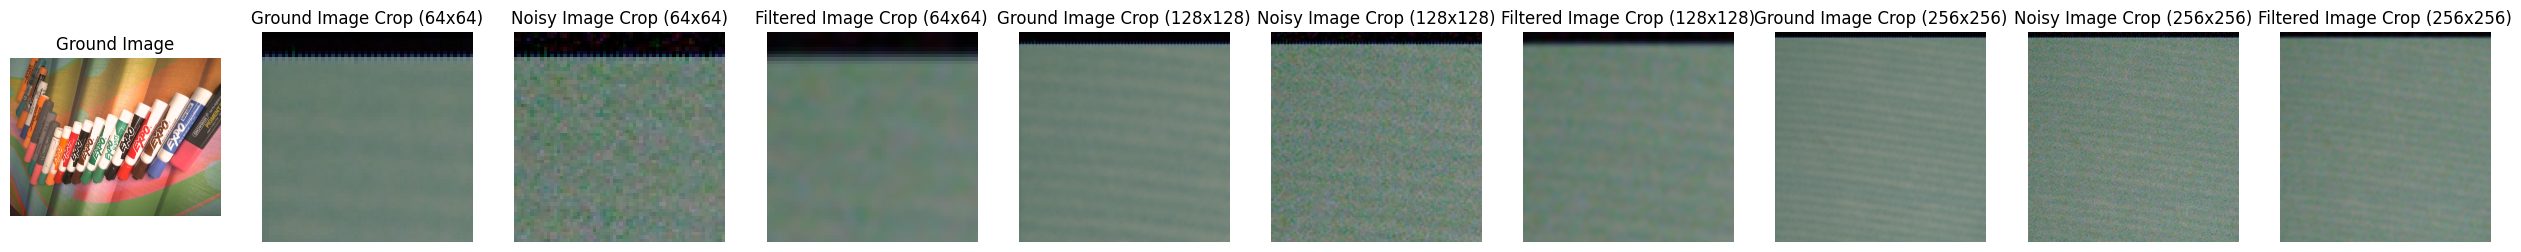

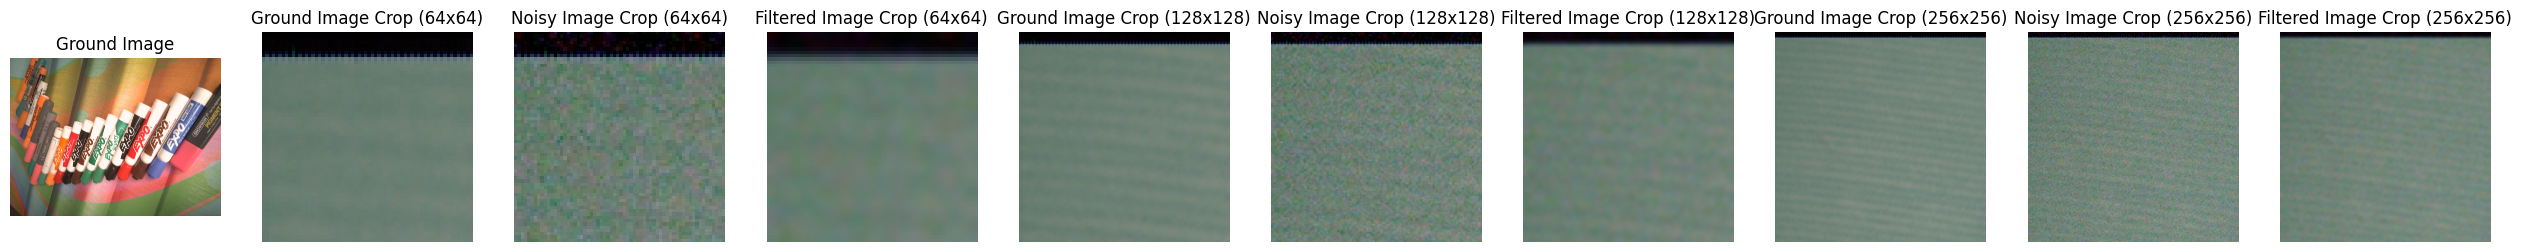

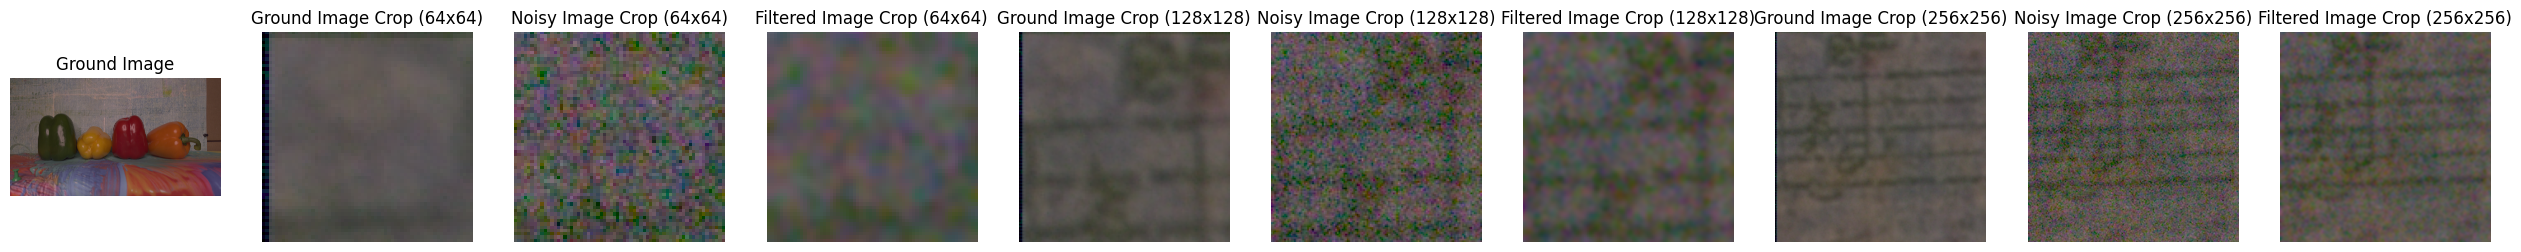

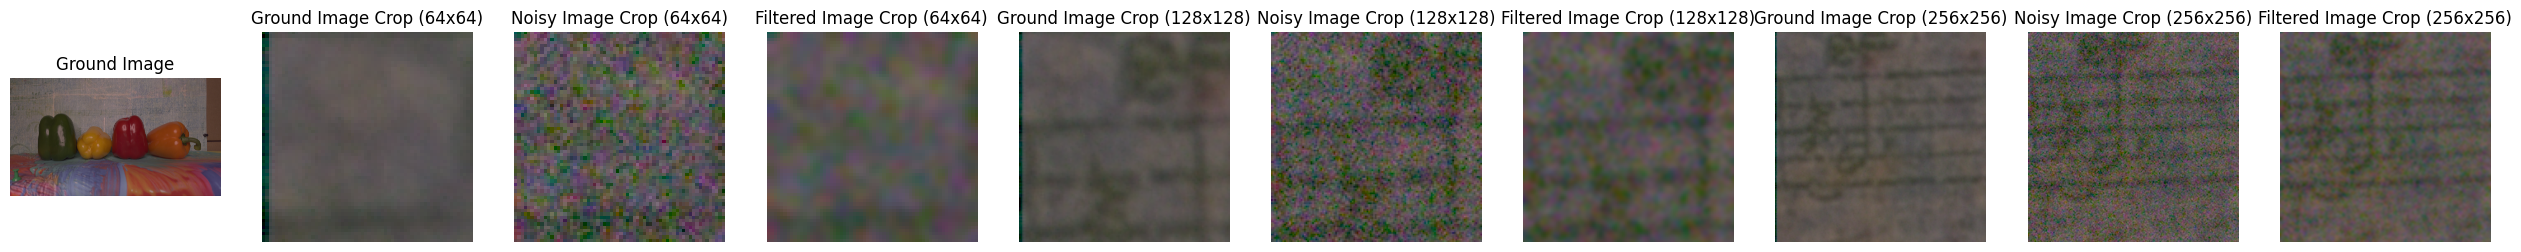

In [11]:
for ground_image, noisy_image, filtered_image in zip(ground_image_list_4k, noisy_image_list_4k, filtered_image_list_4k):
    ground_image = Image.open(ground_image)
    noisy_image = Image.open(noisy_image)
    filtered_image = filtered_image

    # Set the figure size for better visualization
    plt.figure(figsize=(32, 10))

    plt.subplot(1, 10, 1)
    plt.imshow(ground_image)
    plt.title('Ground Image')
    plt.axis('off')

    plt.subplot(1, 10, 2)
    plt.imshow(ground_image.crop((0, 0, 64, 64)))
    plt.title('Ground Image Crop (64x64)')
    plt.axis('off')

    plt.subplot(1, 10, 3)
    plt.imshow(noisy_image.crop((0, 0, 64, 64)))
    plt.title('Noisy Image Crop (64x64)')
    plt.axis('off')

    plt.subplot(1, 10, 4)
    plt.imshow(filtered_image.crop((0, 0, 64, 64)))
    plt.title('Filtered Image Crop (64x64)')
    plt.axis('off')

    plt.subplot(1, 10, 5)
    plt.imshow(ground_image.crop((0, 0, 128, 128)))
    plt.title('Ground Image Crop (128x128)')
    plt.axis('off')

    plt.subplot(1, 10, 6)
    plt.imshow(noisy_image.crop((0, 0, 128, 128)))
    plt.title('Noisy Image Crop (128x128)')
    plt.axis('off')

    plt.subplot(1, 10, 7)
    plt.imshow(filtered_image.crop((0, 0, 128, 128)))
    plt.title('Filtered Image Crop (128x128)')
    plt.axis('off')

    plt.subplot(1, 10, 8)
    plt.imshow(ground_image.crop((0, 0, 256, 256)))
    plt.title('Ground Image Crop (256x256)')
    plt.axis('off')

    plt.subplot(1, 10, 9)
    plt.imshow(noisy_image.crop((0, 0, 256, 256)))
    plt.title('Noisy Image Crop (256x256)')
    plt.axis('off')

    plt.subplot(1, 10, 10)
    plt.imshow(filtered_image.crop((0, 0, 256, 256)))
    plt.title('Filtered Image Crop (256x256)')
    plt.axis('off')

    plt.show()